<a href="https://colab.research.google.com/github/gayatribasude/MachineLearning/blob/master/19223031_wdbc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Diagnosis of Breast Cancer



```
Gayatri Basude
19223031
III Sem, MCA 2019-2022

```


##Introduction


*   The dataset is obtained from a hospital named “Wisconsin”, therefore this dataset is known as Wisconsin Diagnostic Breast Cancer (WDBC). 
*   It has 31 feature attributes and a class attribute. In which all feature attributes are of numeric type and class attribute is categorical. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.
* Number of instances: 569 
* Number of attributes: 32 (ID, diagnosis, 30 real-valued input features)
* Class distribution: 357 benign, 212 malignant
* 0 represents bening and 1 represents malignant.





##Problem Statement

> Here our task is to make a model which identifies or predicts whether a person is suffering from cancer or not by feeding attribute values to a model.


## Strategies used

*   **Dataset:**
 * 569 instances with 30 features
 * Output: 0/1 (benign/malignant)
 * null values: 0
* **Problem type:**
  * Supervised 
  * Categorical
  * Binary Classification
*   **Splitted the dataset into two:**
  * train (70%)- 426 instances
  * test (30%)- 143 instances
* **Normalization:**
  * Used Z score
  * x(new)= (x(old) - mean) /standard_deviation
* **Trained Using SVM (Support Vector Machine):**
  * A support vector machine (SVM) is a supervised machine learning model that uses classification algorithms for two-group classification problems.
  * SVM is well suited for classification of complex but small or medium sized datasets.
* **Tuning the parameter of SVM:**
  * For choosing appropriate value for "gamma" and "C" paramater, I have used GridSeach.
* **CrossValidation and Pipeline:**
  * This splits training dataset into k no of parts and performs training on k-1 parts and tests the model using remaining one part.
  * I have used k=5 for cross validation in GridSearch
  * As training dataset diving itself into parts, and i need to perform normalization operation on training part, therefore to making this work possible, I have used pipeline.
* **Evalution:**
  * Accuracy
 * Confusion Matrix
 * Precision and Recall
 * F1 score
 * AUC ROC curve




##Code

###Imports

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
pd.options.display.width=None

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

Required dataset is also present in sklearn.datasets

In [ ]:
from sklearn.datasets import load_breast_cancer
cancer=load_breast_cancer()

###Overview of dataset

In [ ]:
print("All given information:\n",cancer.keys())

All given information:
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [ ]:
print("data points:\n",cancer['data'])

data points:
 [[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [ ]:
print("Total targets:\n",cancer['target'])

Total targets:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 

In [ ]:
print("Targets:\n",cancer['target_names'])

Targets:
 ['malignant' 'benign']


In [ ]:
print("Description:\n",cancer['DESCR'][:1150])

Description:
 .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is 

In [ ]:
print("feature_names:\n",cancer['feature_names'])

feature_names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
print("filename:\n",cancer['filename'])

filename:
 /usr/local/lib/python3.6/dist-packages/sklearn/datasets/data/breast_cancer.csv


###Statistics

In [ ]:
print("Statistics:\n",pd.DataFrame(cancer['data']).describe())

Statistics:
                0           1           2   ...          27          28          29
count  569.000000  569.000000  569.000000  ...  569.000000  569.000000  569.000000
mean    14.127292   19.289649   91.969033  ...    0.114606    0.290076    0.083946
std      3.524049    4.301036   24.298981  ...    0.065732    0.061867    0.018061
min      6.981000    9.710000   43.790000  ...    0.000000    0.156500    0.055040
25%     11.700000   16.170000   75.170000  ...    0.064930    0.250400    0.071460
50%     13.370000   18.840000   86.240000  ...    0.099930    0.282200    0.080040
75%     15.780000   21.800000  104.100000  ...    0.161400    0.317900    0.092080
max     28.110000   39.280000  188.500000  ...    0.291000    0.663800    0.207500

[8 rows x 30 columns]


###Splitting dataset into 2 parts:
* Train
* Test

In [ ]:
print("Total dataset's shape: ",cancer['data'].shape)

Total dataset's shape:  (569, 30)


In [ ]:
input_train,input_test,output_train,output_test=train_test_split(cancer['data'],cancer['target'],random_state=42)

In [ ]:
print("Shape of input_train: ",input_train.shape)
print("Shape of output_train: ",output_train.shape)
print("Shape of input_test: ",input_test.shape)
print("Shape of output_test: ",output_test.shape)

Shape of input_train:  (426, 30)
Shape of output_train:  (426,)
Shape of input_test:  (143, 30)
Shape of output_test:  (143,)


###Normalization Function (Z score)

In [ ]:
scaler=StandardScaler()

###Model

In [ ]:
svc=SVC()

###Pipeline

In [ ]:
param_grid = {'svm__C': [0.001, 0.01, 0.1, 1, 10, 100],'svm__gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [ ]:
pipe = Pipeline([("scaler", scaler), ("svm", svc)])

###GridSearch

In [ ]:
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(input_train, output_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(input_test, output_test)))
print("Best parameters: {}".format(grid.best_params_))

Best cross-validation accuracy: 0.97
Test set score: 0.99
Best parameters: {'svm__C': 10, 'svm__gamma': 0.001}


###Prediction

In [ ]:
predicted=grid.predict(input_test)

In [ ]:
print("actual result:\n",output_test)

actual result:
 [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1]


In [ ]:
print("predicted result:\n",predicted)

predicted result:
 [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1]


In [ ]:
for i in range(len(output_test)):
  if(output_test[i]!=predicted[i]):
    print("%d, actual:%d, predicted:%d\n"%(i,output_test[i],predicted[i]))

20, actual:0, predicted:1

77, actual:0, predicted:1



###Evalution

In [ ]:
confusion = confusion_matrix(output_test, predicted)
print("Confusion matrix:\n{}".format(confusion))
#rows-actual,cols-predicted

Confusion matrix:
[[52  2]
 [ 0 89]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(output_test, predicted,target_names=['benign','malignant']))

              precision    recall  f1-score   support

      benign       1.00      0.96      0.98        54
   malignant       0.98      1.00      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143



In [ ]:
print("f1 score most frequent: {:.2f}".format(f1_score(output_test, predicted)))

f1 score most frequent: 0.99


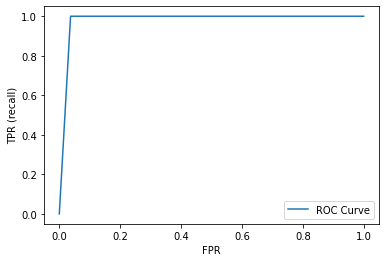

In [ ]:
fpr, tpr, thresholds = roc_curve(output_test, predicted)
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")

plt.legend(loc=4)

##Conclusion

**This model is pretty good**
1.   Best cross-validation accuracy: 0.97
2.   Test set score: 0.99
3. F1 score most frequent: 0.99
 



##References


*   Introduction to Machine Learning with Python: A Guide for Data Scientists 1st Edition
by Andreas C. Müller, Sarah Guido  
* https://stackoverflow.com/questions/44446501/how-to-standardize-data-with-sklearns-cross-val-score

